<a href="https://colab.research.google.com/github/mengheng02/deep-learning-works/blob/main/Lab5_DANN_for_regression_Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
5.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data
import keras #helps for ANN model construction
import tensorflow as tf #helps for ANN model construction
from sklearn.preprocessing import StandardScaler #helps for standardation of input data

# Load data using pandas package
Data structure and data visualiazation


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab_code/IowaExtendedHousingPrices.csv')  #Load data with the corresponding path in google drive

In [ ]:
print (df.columns) # Names of columns

Index(['YearBuilt', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
print (df.shape)   # Size of dataset

(1460, 9)


In [ ]:
print (df.head())  # Display of the first few samples

   YearBuilt  2ndFlrSF  GrLivArea  ...  TotRmsAbvGrd  YrSold  SalePrice
0       2003       854       1710  ...             8    2008     208500
1       1976         0       1262  ...             6    2007     181500
2       2001       866       1786  ...             6    2008     223500
3       1915       756       1717  ...             7    2006     140000
4       2000      1053       2198  ...             9    2008     250000

[5 rows x 9 columns]


In [ ]:
print (df.info())  # Infomation of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   2ndFlrSF      1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   YrSold        1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB
None


In [ ]:
print (df.describe()) # Display some statistical results

         YearBuilt     2ndFlrSF  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean   1971.267808   346.992466  ...  2007.815753  180921.195890
std      30.202904   436.528436  ...     1.328095   79442.502883
min    1872.000000     0.000000  ...  2006.000000   34900.000000
25%    1954.000000     0.000000  ...  2007.000000  129975.000000
50%    1973.000000     0.000000  ...  2008.000000  163000.000000
75%    2000.000000   728.000000  ...  2009.000000  214000.000000
max    2010.000000  2065.000000  ...  2010.000000  755000.000000

[8 rows x 9 columns]


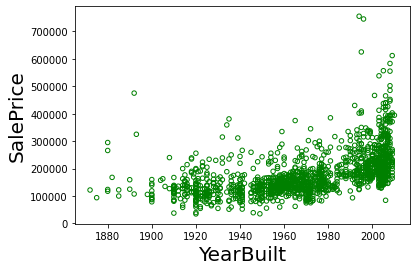

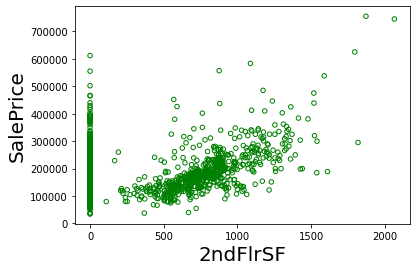

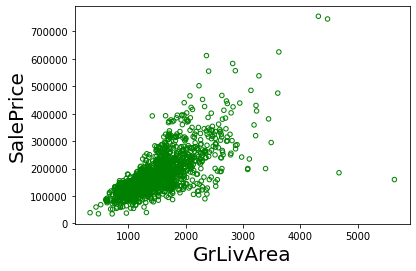

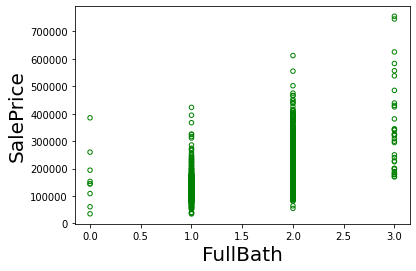

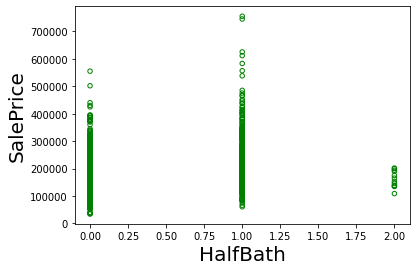

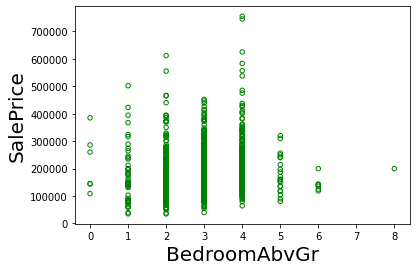

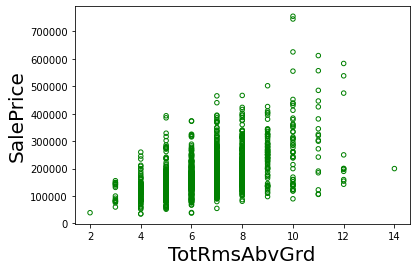

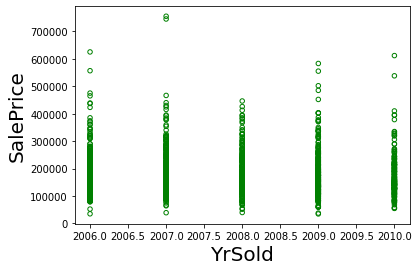

In [ ]:
# Visualization
for column in df.columns[:-1]:
  plt.scatter(df[column], df['SalePrice'], s=20, marker='o', edgecolor=['green'], c='none')  # Scatter data
  plt.xlabel(column, fontsize=20)
  plt.ylabel('SalePrice', fontsize=20)
  plt.show()

X = df.iloc[:,:-1].values                # input data to be an array
Y = df['SalePrice'].values.reshape(-1,1) #labels which are transformed to a shape of (1460, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Randomly split training data and test data with a ratio of 7:3

# Model training

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(8,)))    # we have 10 neurons for output and 8 neurons for input (SquareFeet)
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(10))                      # we have 10 neurons for output and 10 neurons for input
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(1))                       # we have 1 neuron for output (SalePrice) and 10 neurons for input
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-10), 'mean_squared_error') # compile the model with a SGD optimizer
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (X_test, y_test))             #train the model

Epoch 1/100
16/16 - 1s - loss: 23393202176.0000 - val_loss: 5267361792.0000 - 544ms/epoch - 34ms/step
Epoch 2/100
16/16 - 0s - loss: 4420765696.0000 - val_loss: 4875932160.0000 - 77ms/epoch - 5ms/step
Epoch 3/100
16/16 - 0s - loss: 3995512320.0000 - val_loss: 4157757184.0000 - 73ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 3695274496.0000 - val_loss: 3923179264.0000 - 81ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 3676001536.0000 - val_loss: 4143915008.0000 - 79ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 3793250304.0000 - val_loss: 3473157632.0000 - 75ms/epoch - 5ms/step
Epoch 7/100
16/16 - 0s - loss: 3376055552.0000 - val_loss: 3377904640.0000 - 88ms/epoch - 6ms/step
Epoch 8/100
16/16 - 0s - loss: 3247075840.0000 - val_loss: 3201459968.0000 - 77ms/epoch - 5ms/step
Epoch 9/100
16/16 - 0s - loss: 3245100032.0000 - val_loss: 3113922304.0000 - 75ms/epoch - 5ms/step
Epoch 10/100
16/16 - 0s - loss: 3084825344.0000 - val_loss: 3285748736.0000 - 78ms/epoch - 5ms/step
Epoch 

# Model testing

14/14 [==============================] - 0s 3ms/step - loss: 2762770432.0000


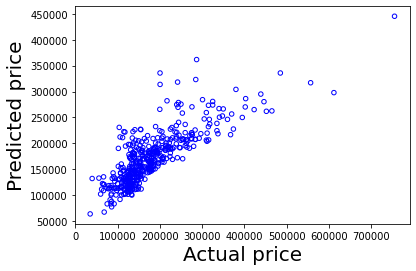

In [ ]:
prediction = model.predict(X_test)    # Predict the testing set
model.evaluate(X_test, y_test)
# Visualization
plt.scatter(y_test, prediction, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

# Data normalization
We find the learning rate is very small, which is confusing. To solve this issue, a normalization of data is performed.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Randomly split training data and test data with a ratio of 7:3

In [ ]:
scaler = StandardScaler()   #call the standardation package
scaler.fit(X_train)         #fit the raw data
X_train = scaler.transform(X_train) #normalization of training data
X_test = scaler.transform(X_test)  #normalization of testing data

y_train_max = max(y_train)      #obtain the maximum of training labels for label normalization
y_train = y_train/y_train_max   #normalization of training labels
y_test = y_test/y_train_max     #normalization of testing labels

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(8,)))    # we have 10 neurons for output and 8 neurons for input (SquareFeet)
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(10))                      # we have 10 neurons for output and 10 neurons for input
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(1))                       # we have 1 neuron for output (SalePrice) and 10 neurons for input
model.compile(tf.keras.optimizers.SGD(learning_rate = 6e-2), 'mean_squared_error') # compile the model with a SGD optimizer
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (X_test, y_test))            # train the model

Epoch 1/100
16/16 - 1s - loss: 0.0653 - val_loss: 0.0418 - 538ms/epoch - 34ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0317 - val_loss: 0.0280 - 75ms/epoch - 5ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0222 - val_loss: 0.0212 - 88ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0174 - val_loss: 0.0174 - 75ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0146 - val_loss: 0.0148 - 81ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0126 - val_loss: 0.0130 - 91ms/epoch - 6ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0113 - val_loss: 0.0117 - 83ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0103 - val_loss: 0.0108 - 82ms/epoch - 5ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0095 - val_loss: 0.0099 - 81ms/epoch - 5ms/step
Epoch 10/100
16/16 - 0s - loss: 0.0089 - val_loss: 0.0093 - 90ms/epoch - 6ms/step
Epoch 11/100
16/16 - 0s - loss: 0.0084 - val_loss: 0.0089 - 76ms/epoch - 5ms/step
Epoch 12/100
16/16 - 0s - loss: 0.0080 - val_loss: 0.0084 - 88ms/epoch - 6ms/step
Epoch 13/100
16/16 - 0s

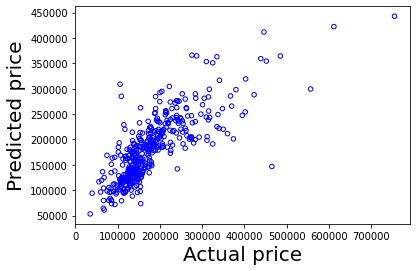

In [ ]:
prediction = model.predict(X_test)    # Predict the testing set

# Visualization
plt.scatter(y_test*y_train_max, prediction*y_train_max, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

In [ ]:
y_train_max**2 * model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 4ms/step - loss: 0.0047


array([2.63024254e+09])

# Extra dropout layer

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(8,)))    # we have 10 neurons for output and 8 neurons for input (SquareFeet)
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dropout(0.03))                   # Use for alleviating model overfitting, 0.08 is the dropout rate.
model.add(keras.layers.Dense(10))                      # we have 10 neurons for output and 10 neurons for input
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(1))                       # we have 1 neuron for output (SalePrice) and 10 neurons for input
model.compile(tf.keras.optimizers.SGD(learning_rate = 6e-2), 'mean_squared_error') # compile the model with a SGD optimizer
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (X_test, y_test))            # train the model


Epoch 1/100
16/16 - 1s - loss: 0.0936 - val_loss: 0.0419 - 571ms/epoch - 36ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0391 - val_loss: 0.0263 - 69ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0266 - val_loss: 0.0192 - 71ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0199 - val_loss: 0.0156 - 82ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0184 - val_loss: 0.0131 - 78ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0150 - val_loss: 0.0115 - 85ms/epoch - 5ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0132 - val_loss: 0.0103 - 80ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0126 - val_loss: 0.0095 - 77ms/epoch - 5ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0119 - val_loss: 0.0088 - 74ms/epoch - 5ms/step
Epoch 10/100
16/16 - 0s - loss: 0.0106 - val_loss: 0.0083 - 82ms/epoch - 5ms/step
Epoch 11/100
16/16 - 0s - loss: 0.0101 - val_loss: 0.0079 - 90ms/epoch - 6ms/step
Epoch 12/100
16/16 - 0s - loss: 0.0095 - val_loss: 0.0075 - 72ms/epoch - 4ms/step
Epoch 13/100
16/16 - 0s

In [ ]:
y_train_max**2 * model.evaluate(X_test, y_test)  # You could find that the testing loss using a Dropout layer is smaller than previous results.

14/14 [==============================] - 0s 5ms/step - loss: 0.0038


array([2.12023297e+09])